# Autoencoder

Autoencoder is an unsupervised method to reduce the dimensionality of data. It is a neural network that is trained to attempt to copy its input to its output. It has an internal (hidden) layer that describes a code used to represent the input, and it is constituted by two parts: an encoder that maps the input into the code, and a decoder that maps the code to a reconstruction of the original input. The code is a compressed representation of the input, also called the latent-space representation.

Typically, an autoencoder can be written in the form of $\tilde{\boldsymbol{x}} = \tilde{f}(\tilde{\boldsymbol{W}}f(\boldsymbol{W}\boldsymbol{x}+\boldsymbol{b})+\tilde{\boldsymbol{f}})$, where $\boldsymbol{x}$ is the input, $\tilde{\boldsymbol{x}}$ is the output, and $\tilde{\boldsymbol{W}},\boldsymbol{W},\boldsymbol{b},\tilde{\boldsymbol{b}}$ are parameters in the neural networks. The function $f$ is the activation function, and $\tilde{f}$ is the activation function of the output layer. The parameters are trained to minimize the reconstruction error, which is the difference between the input $\boldsymbol{x}$ and the reconstruction $\tilde{\boldsymbol{x}}$.<br>
Some times we set $\tilde{\boldsymbol{W}}=\boldsymbol{W}^{T}$, which is called weight sharing.

There are lots of variants of AE.
- Denoising autoencoder: add noise to the input and train the network to recover the original input.
- Sparse autoencoder: add a sparsity constraint on the code layer.
- Variational autoencoder: add a constraint on the distribution of the code layer.
- Contractive autoencoder: add a penalty term to the loss function to make the model more robust to small changes in the input.
- Stacked autoencoder: stack multiple layers of AE to form a deep neural network.
- Convolutional autoencoder: use convolutional layers to encode and decode the data.
- Sequence-to-sequence autoencoder: use RNN to encode and decode the data.
- Adversarial autoencoder: use GAN to encode and decode the data.<br>
I'll introduce them in the following sections. Before I introduce them, I'll introduce the notation I'll use in the following sections. It's bascially referenced from CS294A Lecture notes.

| notation        |descriptions                    |
|--------------|------------------------|
| $x$          |  Inputfeaturesforatrainingexample,$x\in\mathbb{R}^{n}$.                 |
| $y$     | Output/target values.Here,$y$ can be vector valued. In the case of anautoencoder,$y=x$.|
| $(x^{(i)},y^{(i)})$ |The i-th training example|
| $\tilde{x}$ | For an autoencoder, its output; i.e., its reconstruction of the input $x$. |
| $W_{ij}^{(l)}$ | The parameter associated with the connection between unit $j$ in layer $l$,and unit $i$ in layer $l+1$.|
| $b_{i}^{(l)}$ | The bias term associated with unit $i$ in layer $l+1$.|
| $a_{i}^{(l)}$ | The activation of unit $i$ in layer $l$. Additionally, since layer $l_{1}$ is the input layer,we also have $a^{(1)}_{i} = x_{i}$.|
| $f$ | The activation function.|
| $z_{i}^{(l)}$ | Total weighted sum of inputs to unit $i$ in layer $l$. Thus, $a^{(l)}_{i} = f(z^{(l)}_{i} )$|
| $\alpha$ | The learning rate.|
| $s_{l} $| The number of units in layer $l$.|
| $n_{l}$ | The number of layers in the network. Layer $l_{1}$ is usually the input layer,and layer $l_{n_{l}}$ is the output layer.|
| $\lambda$ | The weight decay parameter.|
| $\theta$ | The set of all parameters in the model.|
| $\rho$ | Sparsity parameter,which species our desired level of sparsity|
| $\hat{\rho}_{i}$ |  The average activation of hidden unit $i$ (in the sparse autoencoder).|
| $\beta$ | The weight of the sparsity penalty term.|

## Denoising autoencoder
Denoising autoencoder is a stochastic version of autoencoder. It is trained to reconstruct the original input from a corrupted version of it by first randomly turning some of the input values to zero. The denoising autoencoder is trained to reconstruct the original input from the corrupted version of it. It is forced to learn more robust features that are useful for reconstruction rather than merely memorizing the input.

## Sparse autoencoder
Sparse autoencoder is an autoencoder whose training criterion involves a sparsity penalty term which enforces the model to learn a sparse representation of the input. The sparsity penalty term is usually defined as the Kullback-Leibler divergence between the average activation of each hidden unit $\hat{\rho}_{i}$ and a sparsity parameter $\rho$.<br>
Supposing we are using sigmoid activation function. Informally, we will think of a neuron as being active if its output value is close to 1, or as being inactive if its output value is close to 0. We would like to constrain the neurons to be inactive most of the time.<br>
Recall that $a^{(2)}_{j}$ denotes the activation of hidden unit $j$ in the autoencoder. However, this notation doesn't make explicit what was the input $x$ that led to that activation. Thus, we will write $a^{(2)}_{j}(x)$ to denote the activation of this hidden unit when the network is given a specific input $x$. Further, let
 $$
\hat{\rho}_{j} = \frac{1}{m}\sum_{i=1}^{m}[a^{(2)}_{j}(x^{(i)})]
$$
be the average activation of hidden unit $j$ (averaged over the training set). We would like to (approximately) enforce the constraint
$$
\hat{\rho}_{j} = \rho
$$
Where $\rho$ is the **sparsity parameter**, typically a small value close to zero (say $\rho= 0.05$). To satisfy this constraint, the
hidden units activations must mostly be near 0.

To achieve this, we will add an extra penalty term to our optimization objective that penalizes $j$ deviating significantly from $\rho$. Many choices of the penalty term will give reasonable results. We will choose the following:
$$
\sum_{j=1}^{s_{2}}KL(\rho||\hat{\rho}_{j})=\sum_{j=1}^{s_{2}}\rho\log\frac{\rho}{\hat{\rho}_{j}}+(1-\rho)\log\frac{1-\rho}{1-\hat{\rho}_{j}}
$$
where $s_{2}$ is the number of hidden units in the autoencoder. This is the Kullback-Leibler (KL) divergence between the Bernoulli random variables defined by $\rho$ and $\hat{\rho}_{j}$.<br>
The overall cost function is 
$$
J_{sparse}(W,b)=J(W,b)+\beta\sum_{j=1}^{s_{2}}KL(\rho||\hat{\rho}_{j})
$$
where $J(W,b)$ is the original cost function for the autoencoder, and $\beta$ is the weight of the sparsity penalty term. The parameter $\beta$ controls the weight of the sparsity penalty relative to the weight of the reconstruction error term.

Other variants of autoencoder, especially VAE, will be updated later.

The following codes reference [https://github.com/eugeniaring/Pytorch-tutorial/blob/main/denAE.ipynb](https://github.com/eugeniaring/Pytorch-tutorial/blob/main/denAE.ipynb)

Prepare for the dataset and dataloader. Here we use MNIST dataset.

In [430]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
data_dir = './data/'
train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)
train_transform = transforms.Compose([transforms.ToTensor(),])
test_transform = transforms.Compose([transforms.ToTensor(),])
train_dataset.transform = train_transform
test_dataset.transform = test_transform
m=len(train_dataset)
train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])
batch_size=256
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [500]:

class flatten_encoder(nn.Module):
    def __init__(self, encoded_space_dim,hidden_dim=256):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.BatchNorm1d(28*28),
            nn.Linear(28*28, 2*hidden_dim),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(2*hidden_dim),
            nn.Linear(2*hidden_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(hidden_dim//2),
            nn.Linear(hidden_dim//2, encoded_space_dim),
            nn.Sigmoid()
        )
        self.encoder.apply(self.init_weights_xavier)
    def init_weights_xavier(self, m):
        if type(m) == nn.Linear:
            nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0)
    def forward(self, x):
        x=x.view(-1,28*28)
        x = self.encoder(x)
        return x
class flatten_decoder(nn.Module):
    def __init__(self, encoded_space_dim,hidden_dim=256):
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Linear(encoded_space_dim, hidden_dim//2),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(hidden_dim//2),
            nn.Linear(hidden_dim//2, hidden_dim),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, 2*hidden_dim),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(2*hidden_dim),
            nn.Linear(2*hidden_dim, 28*28),
    )
        self.decoder.apply(self.init_weights_xavier)
    def init_weights_xavier(self, m):
        if type(m) == nn.Linear:
            nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0)
    def forward(self, x):
        x = self.decoder(x)
        x = torch.sigmoid(x)
        return x.view(-1, 1, 28, 28)
class CNN_Encoder(nn.Module):
  def __init__(self, encoded_space_dim,fc2_input_dim=128):
    super().__init__()
    ### Convolutional section
    self.encoder_cnn = nn.Sequential(
      nn.Conv2d(1, 8, 3, stride=2, padding=1),
      nn.ReLU(True),
      nn.Conv2d(8, 16, 3, stride=2, padding=1),
      nn.BatchNorm2d(16),
      nn.ReLU(True),
      nn.Conv2d(16, 32, 3, stride=2, padding=0),
      nn.ReLU(True)
    )
    ### Flatten layer
    self.flatten = nn.Flatten(start_dim=1)### Linear section
    self.encoder_lin = nn.Sequential(
      nn.Linear(3 * 3 * 32, fc2_input_dim),
      nn.ReLU(True),
      nn.Linear(fc2_input_dim, encoded_space_dim),
      nn.Sigmoid(),
    )
  def forward(self, x):
    x = self.encoder_cnn(x)
    x = self.flatten(x)
    x = self.encoder_lin(x)
    return x
class CNN_Decoder(nn.Module):
    def __init__(self, encoded_space_dim,fc2_input_dim=128):
        super().__init__()
        self.decoder_lin = nn.Sequential(
            nn.Linear(encoded_space_dim, fc2_input_dim),
            nn.ReLU(True),
            nn.Linear(fc2_input_dim, 3 * 3 * 32),
            nn.ReLU(True)
    )
        self.unflatten = nn.Unflatten(dim=1,unflattened_size=(32, 3, 3))
        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3,
                                stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),

            nn.ConvTranspose2d(16, 8, 3, stride=2,
                                padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2,
                                padding=1, output_padding=1)
        )
    def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = torch.sigmoid(x)
        return x 

In [501]:
class AutoEncoder(nn.Module):
    def __init__(self,encoded_space_dim,fc2_input_dim,loss_fn=F.mse_loss,lr=1e-4,type='flatten',sparse=False,rho=None,add_noise=False
                ,noise_factor=0.3,l2=0.):
        super(AutoEncoder,self).__init__()
        self.type=type
        self.sparse=sparse
        self.loss_fn=loss_fn
        self.lr=lr
        self._rho_loss = None
        self._loss = None
        if sparse:
            self.rho=rho
        self.add_noise=add_noise
        if add_noise:
            self.noise_factor=noise_factor
        if type=='flatten':
            self.E = flatten_encoder(encoded_space_dim,fc2_input_dim)
            self.D = flatten_decoder(encoded_space_dim,fc2_input_dim)
        elif type=='CNN':
            self.E = CNN_Encoder(encoded_space_dim,fc2_input_dim)
            self.D = CNN_Decoder(encoded_space_dim,fc2_input_dim)
        self.optim = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=l2)
    def rho_loss(self,size_average=True):
        if size_average:
            dkl = self.rho * torch.log(self.rho/self.data_rho) + (1-self.rho)*torch.log((1-self.rho)/(1-self.data_rho))
            return dkl.mean()
        return dkl.sum()
    def loss(self,x,y,**kwargs):
        if self.type=='flatten':
            x=x.view(-1,28*28)
            y=y.view(-1,28*28)
        self._loss= self.loss_fn(x,y,**kwargs)
        return self._loss
    def forward(self,x):
        if self.type=='flatten':
            x=x.view(-1,28*28)
        x = self.E(x)
        if self.sparse==True:
            self.data_rho=torch.mean(x,dim=0)
        x = self.D(x)
        return x

In class `Autoencoder` I integrated denoising AE and sparse AE and Convolutional AE. 
- To use denoising AE, you can set `add_noise` to Ture and noise_factor` to a value between 0 and 1. The higher the value, the more noise will be added to the input data.
- To use sparse AE, you can set `sparse` to True and `rho` to a value between 0 and 1 where `rho` is the sparsity parameter. 
- To use convolutional AE, you can set `type` to `CNN`, otherwise it will be a fully connected AE.

In [502]:
def add_noise(inputs,noise_factor=0.3):
  noisy = inputs+torch.randn_like(inputs) * noise_factor
  noisy = torch.clip(noisy,0.,1.)
  return noisy

In [503]:
def val(model,valid_loader,noise_factor=0.3,device=None):
  model.eval()
  with torch.no_grad(): # No need to track the gradients
    # Define the lists to store the outputs for each batch
    conc_out = []
    conc_label = []
    for image_batch, _ in valid_loader:
      # Move tensor to the proper device
      image_noisy = add_noise(image_batch,noise_factor)
      image_noisy = image_noisy.to(device)
      output = model(image_noisy)
      # Append the network output and the original image to the lists
      conc_out.append(output.cpu())
      conc_label.append(image_batch.cpu())
      # Create a single tensor with all the values in the lists
      conc_out = torch.cat(conc_out)
      conc_label = torch.cat(conc_label)
      # Evaluate global loss
      val_loss = model.loss(conc_out, conc_label)
      return val_loss.item()

In [516]:
def train(num_epochs, model,train_loader, noise_factor=0,beta=0.5,device=None,use_noisy_label=False):
    train_size = len(train_loader.sampler)
    history_da={'train_loss':[],'val_loss':[]}
    for epoch in range(num_epochs):
        model.train()
        image_batch, _ = next(iter(train_loader))
        model.optim.zero_grad()
        if model.add_noise:
            image_noisy = add_noise(image_batch,noise_factor)
            image_noisy = image_noisy.to(device)
            output = model(image_noisy)
        else:
            image_batch = image_batch.to(device)
            output = model(image_batch)
        if model.sparse:
            rho_loss = model.rho_loss(model.rho)
            if use_noisy_label:
                loss = model.loss(output, image_noisy) + beta*rho_loss
            else:
                loss = model.loss(output, image_batch) + beta*rho_loss
        else:
            if use_noisy_label:
                loss = model.loss(output, image_noisy)
            else:
                loss = model.loss(output, image_batch)

        loss.backward()
        model.optim.step()
        history_da['train_loss'].append(loss)
        val_loss = val(model,valid_loader,device=device)
        history_da['val_loss'].append(val_loss)
        if model.sparse:
            print(f"epoch {epoch+1}/{num_epochs}, train loss: {loss.item():.4f}, val loss: {val_loss:.4f}, rho loss: {rho_loss.item():.4f}")
        else:
            print(f"epoch {epoch+1}/{num_epochs}, train loss: {loss.item():.4f}, val loss: {val_loss:.4f}")
        #print('\t partial train loss (single batch): %f' % (loss.item()))   
    return history_da

In the function `train`, You can change `use_noisy_label` to True to use the noised image as labels. `beta` is the weight of the sparsity penalty term, which should be close to 0 since the default rho_loss is averaged.

In [518]:
models = {}
models['flatten'] = AutoEncoder(
    encoded_space_dim=4,
    fc2_input_dim=128,
    loss_fn=F.mse_loss,
    lr=1e-2,
    type='flatten',
    sparse=False,
    rho=None,
    add_noise=False)
models['flatten_sparse'] = AutoEncoder(
    encoded_space_dim=64,
    fc2_input_dim=128,
    loss_fn=F.mse_loss,
    lr=1e-2,
    type='flatten',
    sparse=True,
    rho=0.05,
    add_noise=False)
models['flatten_sparse_noise'] = AutoEncoder(
    encoded_space_dim=64,
    fc2_input_dim=128,
    loss_fn=F.mse_loss,
    lr=1e-2,
    type='flatten',
    sparse=True,
    rho=0.05,
    add_noise=True)
models['CNN'] = AutoEncoder(
    encoded_space_dim=4,
    fc2_input_dim=128,
    loss_fn=F.mse_loss,
    lr=1e-2,
    type='CNN',
    sparse=False,
    rho=None,
    add_noise=False)
models['CNN_sparse'] = AutoEncoder(
    encoded_space_dim=4,
    fc2_input_dim=128,
    loss_fn=F.mse_loss,
    lr=1e-2,
    type='CNN',
    sparse=True,
    rho=0.05,
    add_noise=False)
models['CNN_sparse_noise'] = AutoEncoder(
    encoded_space_dim=4,
    fc2_input_dim=128,
    loss_fn=F.mse_loss,
    lr=1e-2,
    type='CNN',
    sparse=True,
    rho=0.05,
    add_noise=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [519]:
models['flatten'].to(device).train()
models['flatten_sparse'].to(device).train()
models['flatten_sparse_noise'].to(device).train()
models['CNN'].to(device).train()
models['CNN_sparse'].to(device).train()
models['CNN_sparse_noise'].to(device).train()
print(f'Selected device: {device}')# Move both the encoder and the decoder to the selected device

Selected device: cpu


In [ ]:
history_da_flatten = train(num_epochs=300,model=models['flatten'],train_loader=train_loader,noise_factor=0.3,beta=0.0,device=device,use_noisy_label=False)

In [ ]:
history_da_flatten_sparse = train(num_epochs=300,model=models['flatten_sparse'],train_loader=train_loader,noise_factor=0.3,beta=0.05,device=device,use_noisy_label=False)

In [ ]:
history_da_flatten_sparse_noise = train(num_epochs=300,model=models['flatten_sparse'],train_loader=train_loader,noise_factor=0.3,beta=0.05,device=device,use_noisy_label=False)

In [ ]:
history_da_CNN = train(num_epochs=300,model=models['CNN'],train_loader=train_loader,noise_factor=0.3,beta=0.0,device=device,use_noisy_label=False)

In [ ]:
history_da_CNN_sparse = train(num_epochs=300,model=models['CNN_sparse'],train_loader=train_loader,noise_factor=0.3,beta=0.05,device=device,use_noisy_label=False)

In [ ]:
history_da_CNN_sparse_noise = train(num_epochs=300,model=models['CNN_sparse_noise'],train_loader=train_loader,noise_factor=0.3,beta=0.05,device=device,use_noisy_label=False)

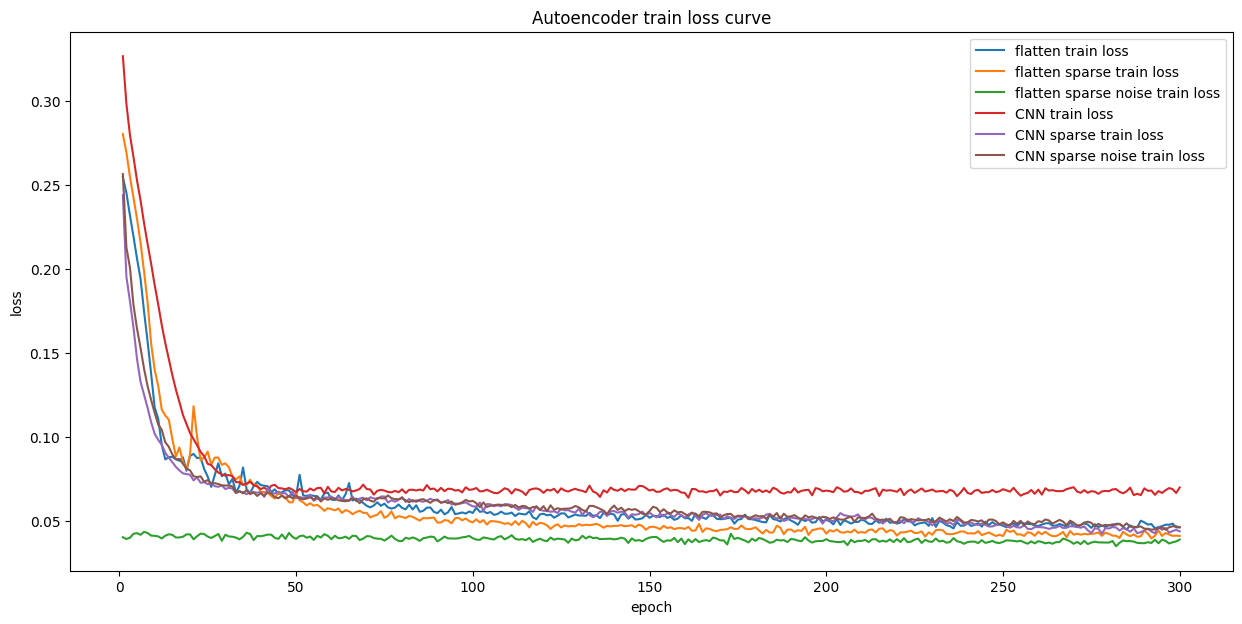

In [559]:
epoch_x = np.arange(1,301)
plt.figure(figsize=(15,7))
flatten_train_loss = [history_da_flatten['train_loss'][i].item() for i in range(len(history_da_flatten['train_loss']))]
flatten_sparse_loss = [history_da_flatten_sparse['train_loss'][i].item() for i in range(len(history_da_flatten_sparse['train_loss']))]
flatten_sparse_noise_loss = [history_da_flatten_sparse_noise['train_loss'][i].item() for i in range(len(history_da_flatten_sparse_noise['train_loss']))]
CNN_train_loss = [history_da_CNN['train_loss'][i].item() for i in range(len(history_da_CNN['train_loss']))]
CNN_sparse_loss = [history_da_CNN_sparse['train_loss'][i].item() for i in range(len(history_da_CNN_sparse['train_loss']))]
CNN_sparse_noise_loss = [history_da_CNN_sparse_noise['train_loss'][i].item() for i in range(len(history_da_CNN_sparse_noise['train_loss']))]
plt.plot(epoch_x,flatten_train_loss,label='flatten train loss')
plt.plot(epoch_x,flatten_sparse_loss,label='flatten sparse train loss')
plt.plot(epoch_x,flatten_sparse_noise_loss,label='flatten sparse noise train loss')
plt.plot(epoch_x,CNN_train_loss,label='CNN train loss')
plt.plot(epoch_x,CNN_sparse_loss,label='CNN sparse train loss')
plt.plot(epoch_x,CNN_sparse_noise_loss,label='CNN sparse noise train loss')
#plt.plot(epoch_x,history_da_flatten['val_loss'],label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Autoencoder train loss curve')
plt.legend()

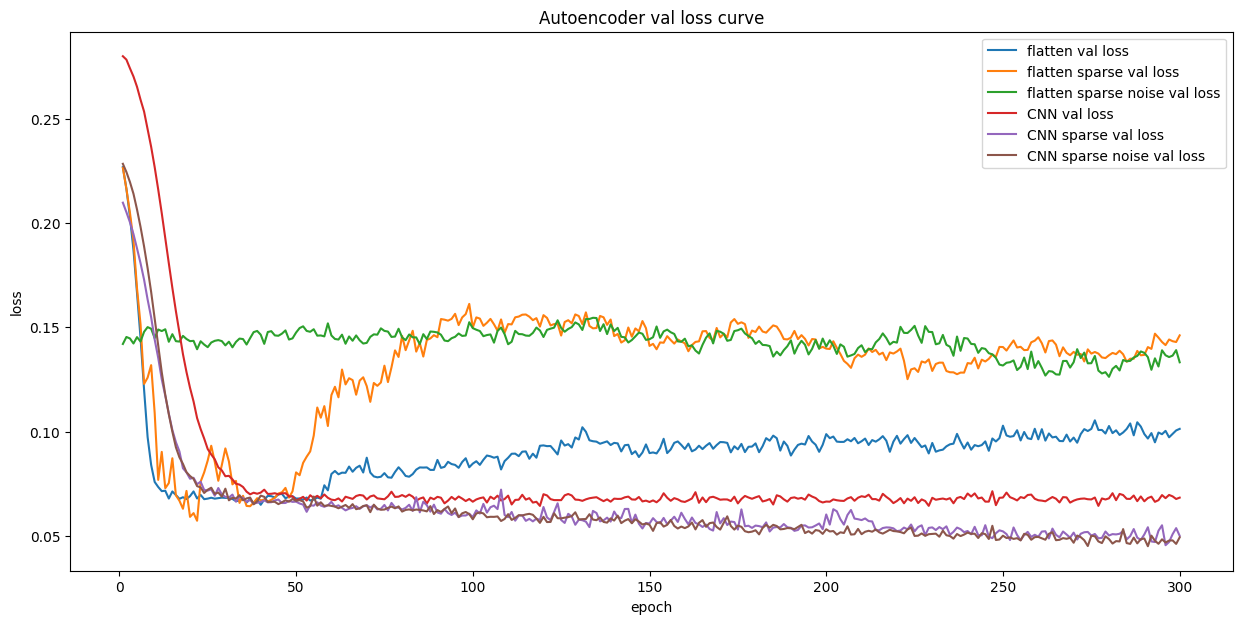

In [561]:
epoch_x = np.arange(1,301)
plt.figure(figsize=(15,7))
flatten_val_loss = [history_da_flatten['val_loss'][i] for i in range(len(history_da_flatten['train_loss']))]
flatten_sparse__val_loss = [history_da_flatten_sparse['val_loss'][i]for i in range(len(history_da_flatten_sparse['train_loss']))]
flatten_sparse_noise_val_loss = [history_da_flatten_sparse_noise['val_loss'][i] for i in range(len(history_da_flatten_sparse_noise['train_loss']))]
CNN_val_loss = [history_da_CNN['val_loss'][i] for i in range(len(history_da_CNN['train_loss']))]
CNN_sparse_val_loss = [history_da_CNN_sparse['val_loss'][i] for i in range(len(history_da_CNN_sparse['train_loss']))]
CNN_sparse_noise_val_loss = [history_da_CNN_sparse_noise['val_loss'][i]for i in range(len(history_da_CNN_sparse_noise['train_loss']))]
plt.plot(epoch_x,flatten_val_loss,label='flatten val loss')
plt.plot(epoch_x,flatten_sparse__val_loss,label='flatten sparse val loss')
plt.plot(epoch_x,flatten_sparse_noise_val_loss,label='flatten sparse noise val loss')
plt.plot(epoch_x,CNN_val_loss,label='CNN val loss')
plt.plot(epoch_x,CNN_sparse_val_loss,label='CNN sparse val loss')
plt.plot(epoch_x,CNN_sparse_noise_val_loss,label='CNN sparse noise val loss')

#plt.plot(epoch_x,history_da_flatten['val_loss'],label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Autoencoder val loss curve')
plt.legend()

In [554]:
def show(model,i,noise_factor=0.0):
    model.eval()
    img = test_dataset[i][0].unsqueeze(0)
    image_noisy = add_noise(img,noise_factor)
    image_noisy = image_noisy.to(device)
    with torch.no_grad():
        rec_img  = model(image_noisy)
        ax = plt.subplot(1,2,1)
        ax.set_title('Original images')
        plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(1,2,2)
        ax.set_title('Reconstructed images')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')

flatten


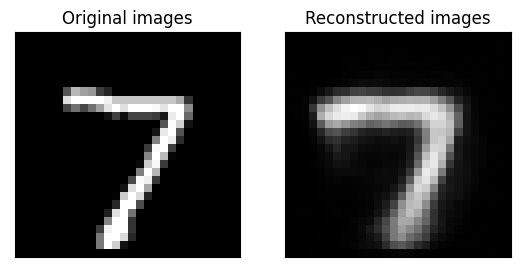

flatten_sparse


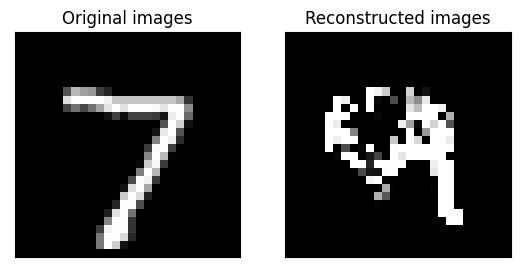

flatten_sparse_noise


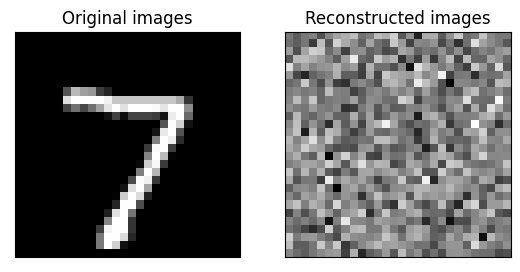

CNN


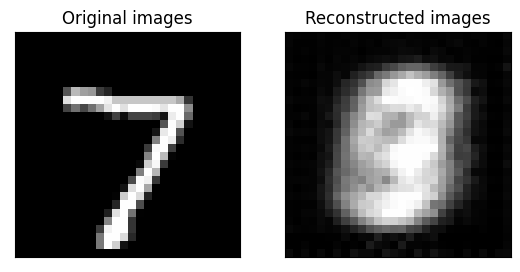

CNN_sparse


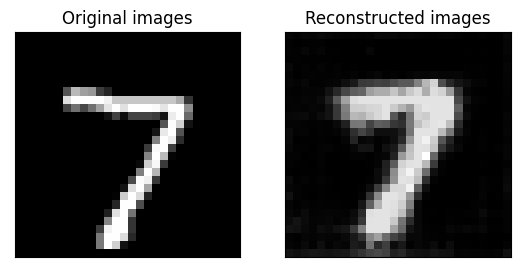

CNN_sparse_noise


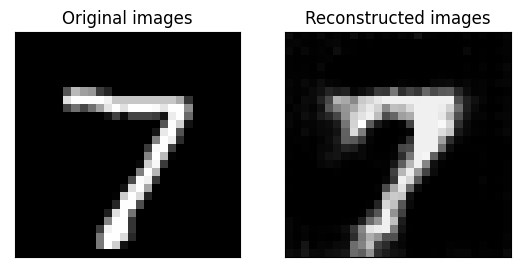

In [557]:
for key in models:
    print(key)
    show(models[key],i=0,noise_factor=0.3)
    plt.show()

The results below are definitely not the best results. I just want to show how to use the class `Autoencoder`. And you can play with the parameters to get better results.

### Orignial code:

In [128]:
from torchsummary import summary
### Define the loss function
loss_fn = torch.nn.MSELoss()
### Define an optimizer (both for the encoder and the decoder!)
lr= 0.01
### Set the random seed for reproducible results
torch.manual_seed(0)### Initialize the two networks
d = 4#model = Autoencoder(encoded_space_dim=encoded_space_dim)
encoder = CNN_Encoder(encoded_space_dim=d,fc2_input_dim=128)
decoder = CNN_Decoder(encoded_space_dim=d,fc2_input_dim=128)
params_to_optimize = [
  {'params': encoder.parameters()},
  {'params': decoder.parameters()}]
optim = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay=1e-05)# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
encoder.to(device)
decoder.to(device)
print(f'Selected device: {device}')# Move both the encoder and the decoder to the selected device

Selected device: cpu


In [121]:
### Training function
def train_epoch_den(encoder, decoder, device, dataloader, loss_fn, optimizer,noise_factor=0.3):    # Set train mode for both the encoder and the decoder
  encoder.train()
  decoder.train()
  train_loss = []    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
  for image_batch, _ in dataloader:
    # with "_" we just ignore the labels (the second element of the dataloader tuple)        # Move tensor to the proper device
    image_noisy = add_noise(image_batch,noise_factor)
    image_noisy = image_noisy.to(device)
    # Encode data
    encoded_data = encoder(image_noisy)
    # Decode data
    decoded_data = decoder(encoded_data)
    # Evaluate loss
    loss = loss_fn(decoded_data, image_noisy)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print batch loss
    print('\t partial train loss (single batch): %f' % (loss.data))        
    train_loss.append(loss.detach().cpu().numpy())
    return np.mean(train_loss) 

In [122]:
### Testing function
def test_epoch_den(encoder, decoder, device, dataloader, loss_fn,noise_factor=0.3):
  # Set evaluation mode for encoder and decoder
  encoder.eval()
  decoder.eval()
  with torch.no_grad(): # No need to track the gradients
    # Define the lists to store the outputs for each batch
    conc_out = []
    conc_label = []
    for image_batch, _ in dataloader:
      # Move tensor to the proper device
      image_noisy = add_noise(image_batch,noise_factor)
      image_noisy = image_noisy.to(device)
      # Encode data
      encoded_data = encoder(image_noisy)
      # Decode data
      decoded_data = decoder(encoded_data)
      # Append the network output and the original image to the lists
      conc_out.append(decoded_data.cpu())
      conc_label.append(image_batch.cpu())
      # Create a single tensor with all the values in the lists
      conc_out = torch.cat(conc_out)
      conc_label = torch.cat(conc_label)
      # Evaluate global loss
      val_loss = loss_fn(conc_out, conc_label)
      return val_loss.data 

In [123]:
def plot_ae_outputs_den(encoder,decoder,n=5,noise_factor=0.3):
  plt.figure(figsize=(10,4.5))
  for i in range(n):
    ax = plt.subplot(3,n,i+1)
    img = test_dataset[i][0].unsqueeze(0)
    image_noisy = add_noise(img,noise_factor)
    image_noisy = image_noisy.to(device)
    encoder.eval()
    decoder.eval()
    with torch.no_grad():
      rec_img  = decoder(encoder(image_noisy))
      plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      if i == n//2:
        ax.set_title('Original images')
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image_noisy.cpu().squeeze().numpy(), cmap='gist_gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n//2:
          ax.set_title('Corrupted images')
          ax = plt.subplot(3, n, i + 1 + n + n)
          plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)
          if i == n//2:
            ax.set_title('Reconstructed images')
            plt.subplots_adjust(left=0.1,
                                bottom=0.1,
                                right=0.7,
                                top=0.9,
                                wspace=0.3,
                                hspace=0.3)
            plt.show()

In [ ]:
### Training cycle
noise_factor = 0.3
num_epochs = 300
history_da={'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
  print('EPOCH %d/%d' % (epoch + 1, num_epochs))
  ### Training (use the training function)
  train_loss=train_epoch_den(
    encoder=encoder,
    decoder=decoder,
    device=device,
    dataloader=train_loader,
    loss_fn=loss_fn,
    optimizer=optim,noise_factor=noise_factor)
  ### Validation  (use the testing function)
  val_loss = test_epoch_den(
    encoder=encoder,
    decoder=decoder,
    device=device,
    dataloader=valid_loader,
    loss_fn=loss_fn,noise_factor=noise_factor)
  # Print Validationloss
  history_da['train_loss'].append(train_loss)
  history_da['val_loss'].append(val_loss)
  print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs,train_loss,val_loss))
  #plot_ae_outputs_den(encoder,decoder,noise_factor=noise_factor)